## CANDISC - vins dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### vins dataset

In [2]:
#vins dataset
from discrimintools.datasets import load_vins
D = load_vins()
print(D.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1924 to 1957
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  34 non-null     int64 
 1   Soleil       34 non-null     int64 
 2   Chaleur      34 non-null     int64 
 3   Pluie        34 non-null     int64 
 4   Qualite      34 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.6+ KB
None


In [3]:
#split into X and y
y, X = D["Qualite"], D.drop(columns=["Qualite"])

### `instanciation & training`

In [4]:
from discrimintools import CANDISC
clf = CANDISC(n_components=2,classes=("Mediocre","Moyen","Bon"))

#### `fit` function

In [5]:
#fit function
clf.fit(X,y)

,n_components,2
,classes,"('Mediocre', ...)"
,warn_message,True


#### `eval_predict` function

In [6]:
#eval_predict function
eval_train = clf.eval_predict(X,y,verbose=True)

Observation Profile:
                        Read  Used
Number of Observations    34    34

Number of Observations Classified into Qualite:
prediction  Mediocre  Moyen  Bon  Total
Qualite                                
Mediocre          10      2    0     12
Moyen              1      8    2     11
Bon                0      2    9     11
Total             11     12   11     34

Percent Classified into Qualite:
prediction   Mediocre      Moyen        Bon  Total
Qualite                                           
Mediocre    83.333333  16.666667   0.000000  100.0
Moyen        9.090909  72.727273  18.181818  100.0
Bon          0.000000  18.181818  81.818182  100.0
Total       32.352941  35.294118  32.352941  100.0
Priors       0.352941   0.323529   0.323529    NaN

Error Count Estimates for Qualite:
        Mediocre     Moyen       Bon     Total
Rate    0.166667  0.272727  0.181818  0.205882
Priors  0.352941  0.323529  0.323529       NaN

Classification Report for Qualite:
              pr

In [7]:
#score function
print("Accuracy : {}%".format(100*round(clf.score(X,y),2)))

Accuracy : 79.0%


In [8]:
#error rate
print("Error rate : {}%".format(100-100*round(clf.score(X,y),2)))

Error rate : 21.0%


### Canonical coefficients

In [9]:
#canonical coefficients
cancoef = clf.cancoef_
cancoef._fields

('raw', 'total', 'pooled')

#### Total Sample Standardized Canonical Coefficients

In [10]:
#Total Sample Standardized Canonical Coefficients
print(cancoef.total)

                 Can1      Can2
Temperature  1.209391 -0.006530
Soleil       0.857727 -0.674811
Chaleur     -0.270993  1.278476
Pluie       -0.536131  0.564364


#### Pooled Within class Standardized Canonical Coefficients

In [11]:
#Pooled Within class Standardized Canonical Coefficients
print(cancoef.pooled)

                 Can1      Can2
Temperature  0.750126 -0.004050
Soleil       0.547064 -0.430399
Chaleur     -0.198237  0.935229
Pluie       -0.445097  0.468536


### Raw canonical coefficients

In [12]:
#raw canonical coefficients
print(cancoef.raw)

                  Can1      Can2
Constant    -32.876282  2.165279
Temperature   0.008566 -0.000046
Soleil        0.006774 -0.005329
Chaleur      -0.027054  0.127636
Pluie        -0.005866  0.006175


### Class Means on Canonical Variables

In [13]:
#Class Means on Canonical Variables
print(clf.classes_.coord)

              Can1      Can2
Mediocre -2.079247  0.221184
Moyen     0.146307 -0.513104
Bon       2.121963  0.271812


### `summary`

In [14]:
from discrimintools import summaryCANDISC

#### Simple summary

In [15]:
#simple summary
summaryCANDISC(clf)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size     34            DF Total        33
1          Variables      4   DF Within Classes        31
2            Classes      3  DF Between Classes         2

Class Level Information:
          Frequency  Proportion  Prior Probability
Mediocre         12      0.3529             0.3529
Moyen            11      0.3235             0.3235
Bon              11      0.3235             0.3235

Total-Sample Class Means:
              Mediocre      Moyen        Bon
Temperature  3037.3333  3140.9091  3306.3636
Soleil       1126.4167  1262.9091  1363.6364
Chaleur        12.0833    16.4545    28.5455
Pluie         430.3333   339.6364   305.0000

Importance of components:
      Eigenvalue  Difference  Proportion  Cumulative
Can1      3.2789      3.1403     95.9451     95.9451
Can2      0.1386         NaN      4.0549    100

#### Detailed summary

In [16]:
#detailed summary
summaryCANDISC(clf,detailed=True)

                     Canonical Discriminant Analysis - Results                     

Summary Information:
               infos  Value                  DF  DF value
0  Total Sample Size     34            DF Total        33
1          Variables      4   DF Within Classes        31
2            Classes      3  DF Between Classes         2

Class Level Information:
          Frequency  Proportion  Prior Probability
Mediocre         12      0.3529             0.3529
Moyen            11      0.3235             0.3235
Bon              11      0.3235             0.3235

Total-Sample Class Means:
              Mediocre      Moyen        Bon
Temperature  3037.3333  3140.9091  3306.3636
Soleil       1126.4167  1262.9091  1363.6364
Chaleur        12.0833    16.4545    28.5455
Pluie         430.3333   339.6364   305.0000

Importance of components:
      Eigenvalue  Difference  Proportion  Cumulative
Can1      3.2789      3.1403     95.9451     95.9451
Can2      0.1386         NaN      4.0549    100

### Evaluation of prediction on testing dataset

#### Testing data

In [17]:
#testining data
XTest = load_vins("test")
print(XTest.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1958 to 1958
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  1 non-null      int64
 1   Soleil       1 non-null      int64
 2   Chaleur      1 non-null      int64
 3   Pluie        1 non-null      int64
dtypes: int64(4)
memory usage: 40.0 bytes
None


#### prediction on testing data

In [18]:
#predict on testing data
print(clf.predict(XTest))

1958    Mediocre
Name: prediction, dtype: object


#### Coordinates of new individual

In [19]:
#coordinates of new individual
print(clf.transform(XTest))

          Can1      Can2
1958 -2.027679  0.569395


### Plotting

In [20]:
#plotting
from discrimintools import fviz_candisc

#### Graph of individuals

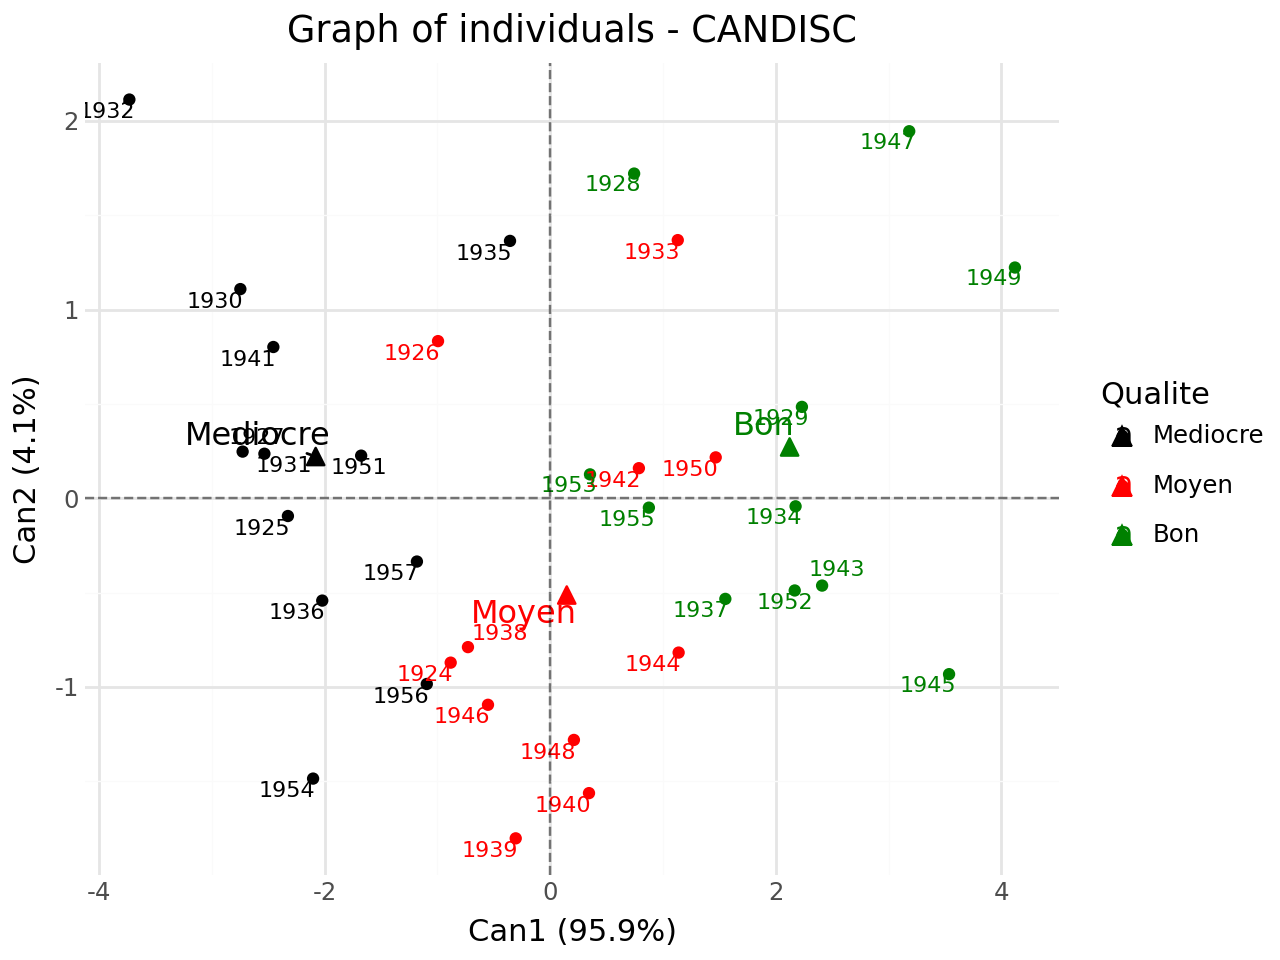

In [21]:
#graph of individuals
p = fviz_candisc(clf,element="ind",repel=True)
p.show()

We add supplementary individuals to initial plot.

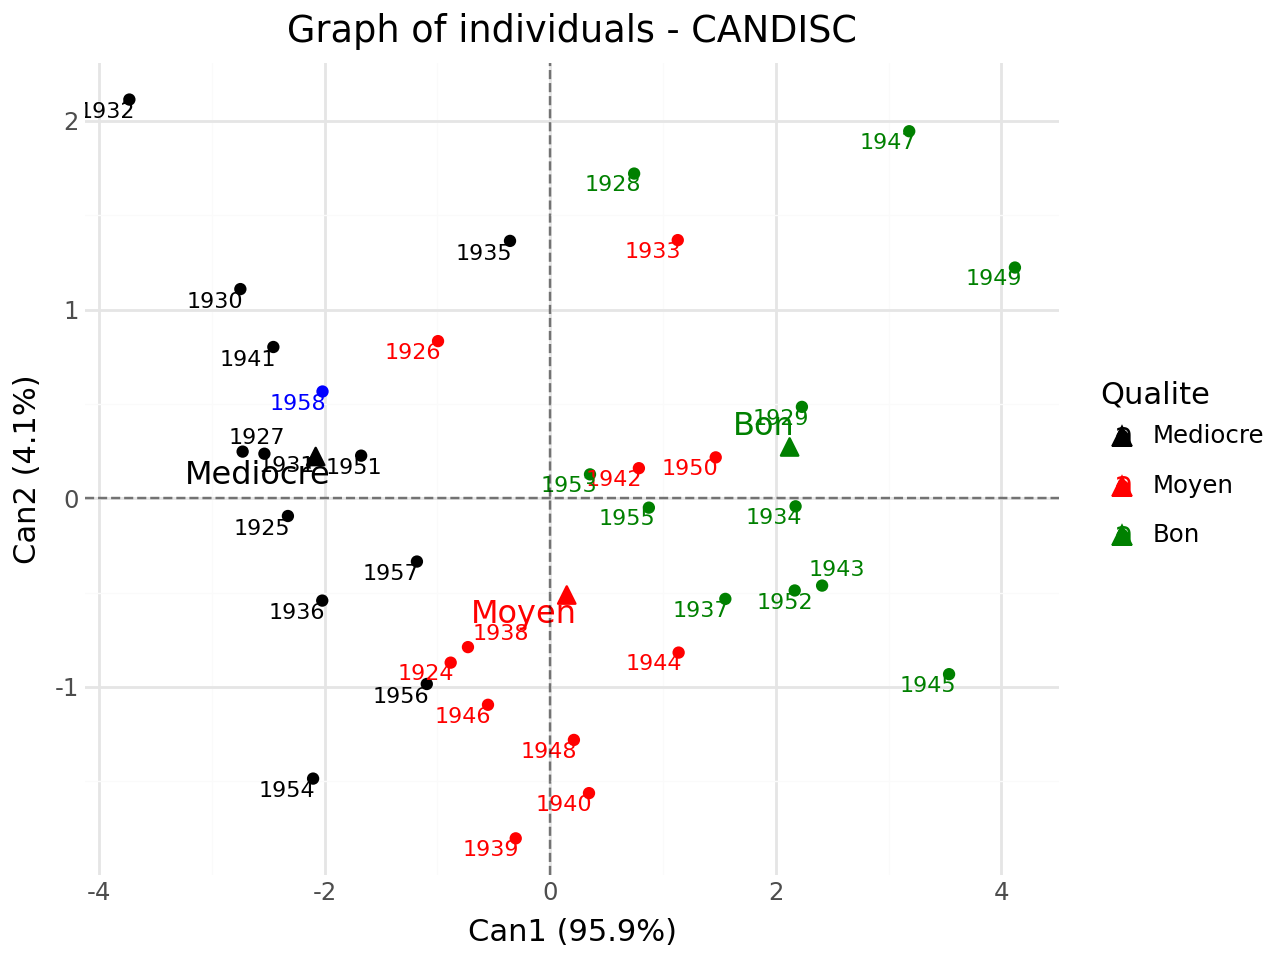

In [22]:
#with supplementary individuals
from discrimintools import add_scatter
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
p.show()

#### Graph of variables

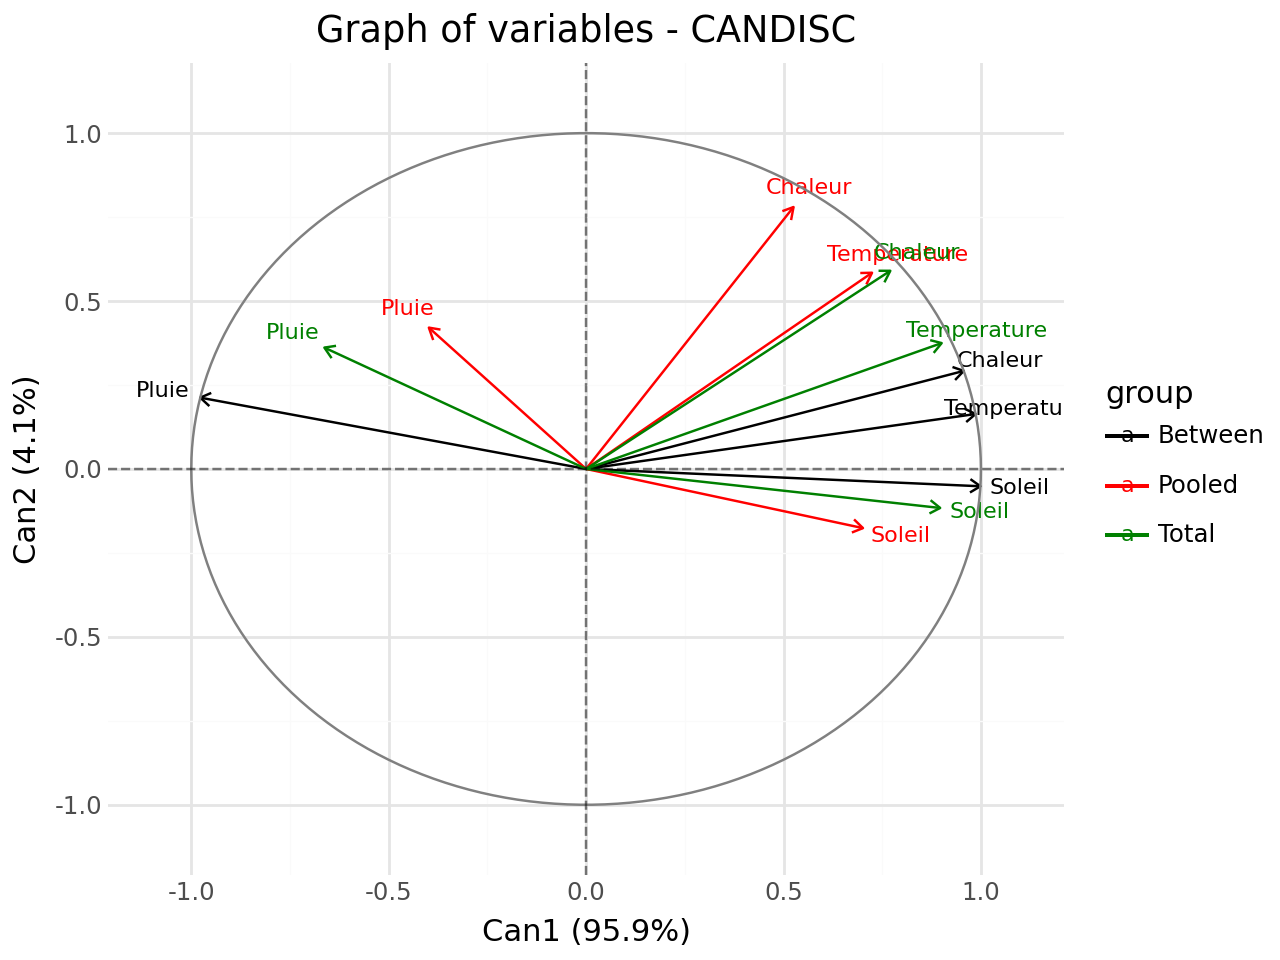

In [23]:
#graph of variables
fviz_candisc(clf,element="var",repel=True).show()

#### Biplot of individuals and variiables

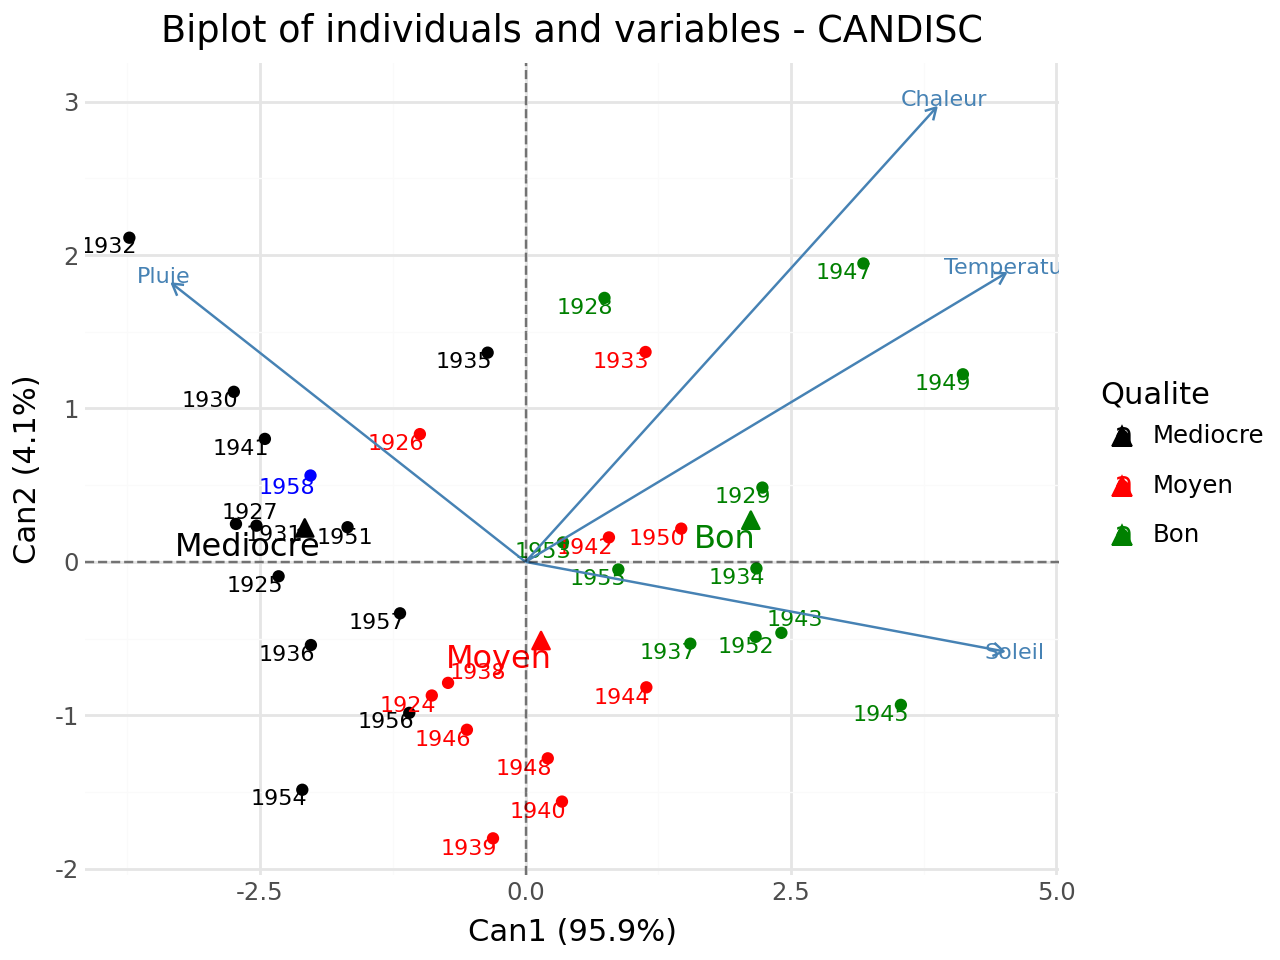

In [24]:
#biplot of individuals and variables
p = fviz_candisc(clf,element="biplot",repel=True)
#add supplementary individuals
p = add_scatter(p,clf.transform(XTest),color="blue",repel=True)
p.show()

#### Distance between barycenter

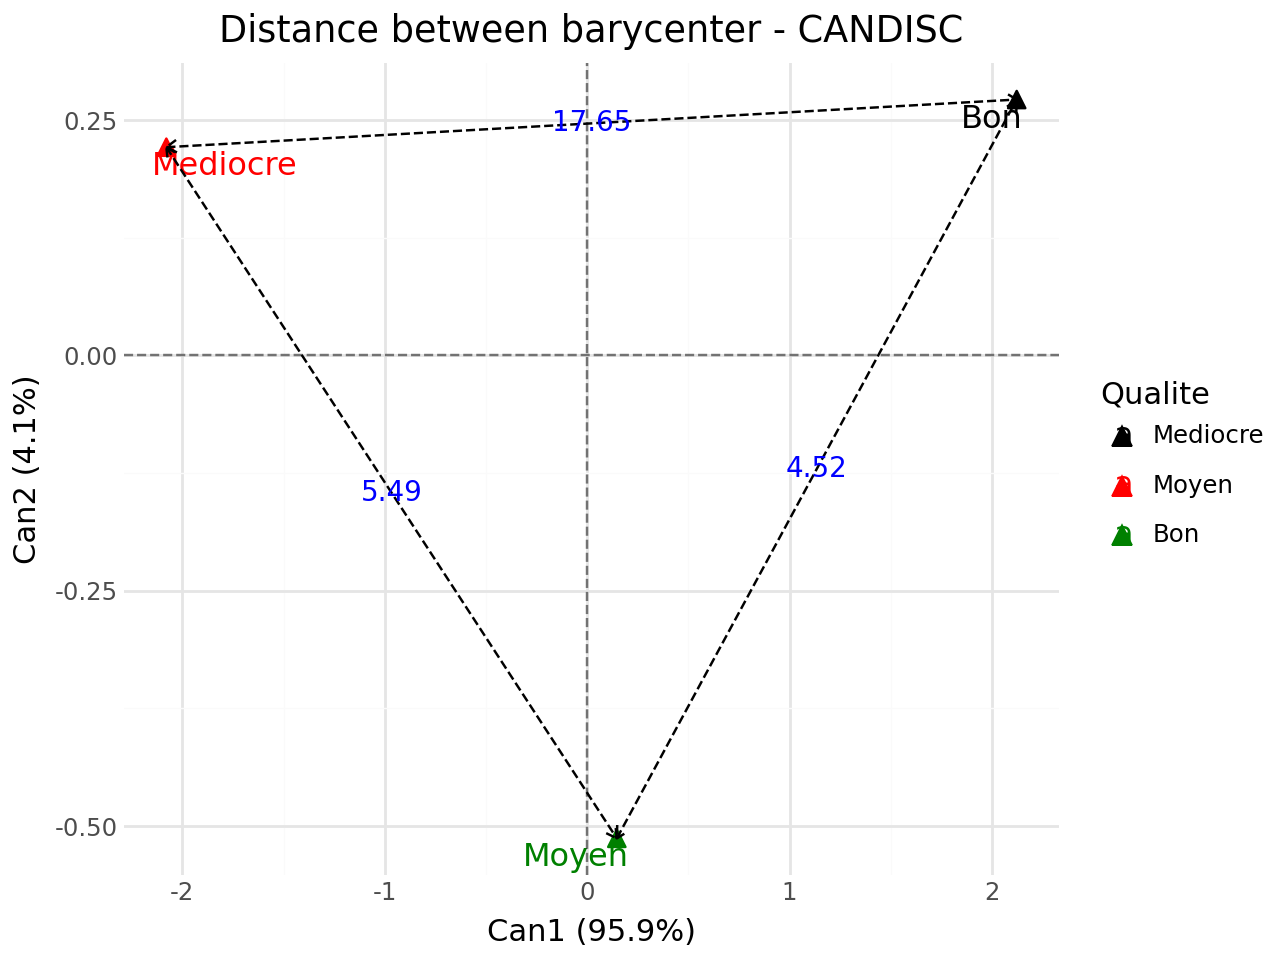

In [25]:
#distance between barycenter
fviz_candisc(clf,element="dist",repel=True).show()